### PyTorch安装与环境配置

In [96]:
import torch
import torchvision
import torch.utils.data as Data
import torch.optim as optim
import random
import numpy as np

from torch import nn
from matplotlib import pyplot as plt

In [4]:
torch.rand(2,3)

tensor([[0.2024, 0.8727, 0.1505],
        [0.4524, 0.6841, 0.6142]])

### 基本数据处理与计算操作
#### 创建Tensor

In [5]:
# 创建一个2x3的未初始化的Tensor
torch.empty(2, 3)

tensor([[1.1210e-44, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [6]:
# 创建一个2x3的随机初始化的Tensor
torch.rand(2,3)

tensor([[0.0325, 0.8458, 0.9704],
        [0.9990, 0.0427, 0.1527]])

In [7]:
# 创建一个2x3的long型全0的Tensor
torch.zeros(2, 3, dtype=torch.long)

tensor([[0, 0, 0],
        [0, 0, 0]])

In [8]:
# 直接根据数据创建
x = torch.tensor([[5,5,3], [2,2,5]])
x

tensor([[5, 5, 3],
        [2, 2, 5]])

In [9]:
# 返回的tensor默认具有相同的torch.dtype和torch.device 
x = x.new_ones(2, 3, dtype=torch.float64)
x

tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [10]:
# 指定新的数据类型
x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 0.6176, -0.8275, -1.7215],
        [ 0.9033, -0.1312, -2.8815]])

In [11]:
x.shape

torch.Size([2, 3])

In [12]:
x.size()

torch.Size([2, 3])

#### Tensor的相关操作

##### 算术操作

In [13]:
x = torch.rand(2, 3) 
y = torch.rand(2, 3)
x,y

(tensor([[0.4473, 0.3372, 0.4641],
         [0.9403, 0.1416, 0.7600]]),
 tensor([[0.3539, 0.0769, 0.2622],
         [0.6555, 0.6301, 0.6811]]))

In [14]:
# 加法形式1
x + y

tensor([[0.8012, 0.4141, 0.7263],
        [1.5958, 0.7716, 1.4411]])

In [15]:
# 加法形式2
torch.add(x, y)

tensor([[0.8012, 0.4141, 0.7263],
        [1.5958, 0.7716, 1.4411]])

In [16]:
# 加法形式3，inplace(原地操作)
y.add_(x)
y

tensor([[0.8012, 0.4141, 0.7263],
        [1.5958, 0.7716, 1.4411]])

In [17]:
x.copy_(y), x.t_()

(tensor([[0.8012, 1.5958],
         [0.4141, 0.7716],
         [0.7263, 1.4411]]),
 tensor([[0.8012, 1.5958],
         [0.4141, 0.7716],
         [0.7263, 1.4411]]))

##### 索引
索引出来的结果与原数据`共享内存`，也即修改一个，另一个会跟着修改。

In [18]:
x, y

(tensor([[0.8012, 1.5958],
         [0.4141, 0.7716],
         [0.7263, 1.4411]]),
 tensor([[0.8012, 0.4141, 0.7263],
         [1.5958, 0.7716, 1.4411]]))

In [19]:
y = x[0, :]
y

tensor([0.8012, 1.5958])

In [20]:
y += 1
y

tensor([1.8012, 2.5958])

In [21]:
x[0, :]

tensor([1.8012, 2.5958])

##### 切片 index_select
沿着指定维度对输入进行切片，取index中指定的相应项(index 为一个 LongTensor)，然后返回到一个新的张量， 返回的张量与原始张量 Tensor 有相同的维度(在指定轴上)。

注意： `返回的张量不与原始张量共享内存空间`。<br>

参数:<br>
input (Tensor)         – 输入张量<br>
dim (int)              – 索引的轴<br>
index (LongTensor)     – 包含索引下标的一维张量<br>
out (Tensor, optional) – 目标张量<br>

In [44]:
x = torch.randn(3, 4)
x

tensor([[-0.3500,  1.6039,  0.5196,  0.2308],
        [ 0.5187,  0.1429, -0.7139,  1.2255],
        [-0.0683,  0.7346, -0.3223, -1.0955]])

In [46]:
indices = torch.LongTensor([0, 2])
indices

tensor([0, 2])

In [47]:
# 按行(dim=0)选取第0行、第2行
torch.index_select(x, 0, indices)

tensor([[-0.3500,  1.6039,  0.5196,  0.2308],
        [-0.0683,  0.7346, -0.3223, -1.0955]])

##### 改变形状 view/reshape
1. `view()`<br>
注意view()**返回的新Tensor与源Tensor虽然可能有不同的size**，但`共享data`。<br>
即更改其中的一个，另外一个也会跟着改变。(顾名思义，view仅仅是改变了对这个张量的 观察角度，内部数据并未改变)
2. `reshape()` 和 `clone()`<br> 
Pytorch还提供了一个 reshape() 方法可以改变形状，但是此函数并不能保证返回的是其拷贝，所以不推荐使用。<br> 
我们推荐先用 clone() 创造一个副本然后再使用view()。

In [22]:
x, y

(tensor([[1.8012, 2.5958],
         [0.4141, 0.7716],
         [0.7263, 1.4411]]),
 tensor([1.8012, 2.5958]))

In [23]:
# 一个tensor必须是连续的contiguous()才能被查看。
# 一开始不加contiguous()，报 “view size is not compatible ... ” 错误，因为在 2.2.1 索引时修改了 x 数组的值
y = x.contiguous().view(6)
y

tensor([1.8012, 2.5958, 0.4141, 0.7716, 0.7263, 1.4411])

In [28]:
z = x.contiguous().view(-1, 3) # -1所指的维度可以根据其他维度的值推出来
z

tensor([[1.8012, 2.5958, 0.4141],
        [0.7716, 0.7263, 1.4411]])

In [29]:
x.size(), y.size(), z.size()

(torch.Size([3, 2]), torch.Size([6]), torch.Size([2, 3]))

In [33]:
x_cp = x.clone().contiguous().view(6)
x -= 1
x_cp, x

(tensor([1.8012, 2.5958, 0.4141, 0.7716, 0.7263, 1.4411]),
 tensor([[ 0.8012,  1.5958],
         [-0.5859, -0.2284],
         [-0.2737,  0.4411]]))

#### 广播机制
当我们对两个形状不同的Tensor按元素运算时，可能会触发`广播(broadcasting)机制`。 <br>
先适当复制元素使这两个Tensor形状相同后再按元素运算。

In [35]:
# x 中第一行的2个 元素被广播(复制)到了第二行和第三行
# y 中第一列的3个元素被广播(复制)到 了第二列
x = torch.arange(1, 3).view(1, 2)
y = torch.arange(1, 4).view(3, 1)
x, y, x+y

(tensor([[1, 2]]),
 tensor([[1],
         [2],
         [3]]),
 tensor([[2, 3],
         [3, 4],
         [4, 5]]))

#### Tensor和NumPy相互转换
+ `numpy()`和`from_numpy()` <br>
这两个函数所产生的的Tensor和NumPy中的数组共享相同的内存(所以他们之间的转换很快)，改变其中一个时另一个也会改变!
+ `torch.tensor()` <br>
进行**数据拷贝**，所以返回的Tensor和原来 的数据不再共享内存。

##### Tensor转NumPy数组

In [36]:
a = torch.ones(3)
b = a.numpy()
a, b

(tensor([1., 1., 1.]), array([1., 1., 1.], dtype=float32))

In [37]:
a += 1
a, b

(tensor([2., 2., 2.]), array([2., 2., 2.], dtype=float32))

In [38]:
b += 1
a, b

(tensor([3., 3., 3.]), array([3., 3., 3.], dtype=float32))

##### NumPy数组转 Tensor

In [40]:
a = np.ones(3)
b = torch.from_numpy(a)
a, b

(array([1., 1., 1.]), tensor([1., 1., 1.], dtype=torch.float64))

In [41]:
a += 1
a, b

(array([2., 2., 2.]), tensor([2., 2., 2.], dtype=torch.float64))

In [42]:
b += 1
a, b

(array([3., 3., 3.]), tensor([3., 3., 3.], dtype=torch.float64))

In [43]:
# 使用torch.tensor()将NumPy数组转换成Tensor(不再共享内存)
c = torch.tensor(a)
a += 1
a, c

(array([4., 4., 4.]), tensor([3., 3., 3.], dtype=torch.float64))

#### Tensor on GPU
+ `to()`<br>
将Tensor在CPU和GPU(需要硬件支持)之间相互移动。

#### 自动求梯度
+ `autograd 包`<br>
根据输入和**前向传播**过程自动构建计算图，并执行**反向传播**。
+ `Tensor`是autograd包的核心类<br>
将其属性`.requires_grad`设置为True，它将开始追踪在其上的所有操作(这样就可以利用链式法则进行梯度传播了)。<br>
完成计算后，可以调用`.backward()`来完成所有梯度计算。此Tensor的梯度将累积到.grad属性中。<br>
如果不想要被继续追踪，可以调用`.detach()`将其从追踪记录中分离出来，这样就可以防止将来的计算被追踪，这样梯度就传不过去了。<br>
此外，还可以用`with torch.no_grad()`将不想被追踪的操作代码块包裹起来，这种方法在评估模型的时候很常用，因为在评估模型时，我们并不需要计算 可训练参数(requires_grad=True)的梯度。
+ `Function`是另外一个很重要的类。<br>
Tensor和Function互相结合就可以构建一个记录有整个计算过程的**有向无环图(DAG)**。<br>
每个Tensor都有一个.grad_fn属性，该属性即创建该Tensor的Function, 就是说该Tensor是不是通过某些运算得到的，若是，则grad_fn返回一个与这些运算相关的对象，否则是None。

##### Tensor

In [5]:
# 创建一个Tensor并设置requires_grad=True:
# x是直接创建的，所以它没有grad_fn
x = torch.ones(2, 2, requires_grad=True)
x, x.grad_fn 

(tensor([[1., 1.],
         [1., 1.]], requires_grad=True),
 None)

In [9]:
# y 是通过一个加法操作创建的，所以它有一个为<AddBackward>的grad_fn
y = x + 2
y, y.grad_fn

(tensor([[3., 3.],
         [3., 3.]], grad_fn=<AddBackward0>),
 <AddBackward0 at 0x133ddf400>)

In [10]:
z = y * y * 3 
out = z.mean()
z, out

(tensor([[27., 27.],
         [27., 27.]], grad_fn=<MulBackward0>),
 tensor(27., grad_fn=<MeanBackward0>))

In [13]:
# 通过.requires_grad_()来用in-place的方式改变requires_grad属性
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
a.requires_grad

False

In [14]:
a.requires_grad_(True)
a.requires_grad

True

In [15]:
b = (a * a).sum()
b.grad_fn

##### 梯度

In [11]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()  # 等价于 out.backward(torch.tensor(1.))
x.grad

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])

令out为o，因为
$$
O = \frac 1 4 \sum_i^4 z_i = \frac 1 4 \sum_i^4 3y_i^2 = \frac 1 4 \sum_i^4 3(x_i+2)^2
$$
所以<br>
$$
\frac{\partial{O}}{\partial{x_i}}|_{x_i=1} = \frac 9 2 = 4.5
$$

In [12]:
# 注意grad是累加的
out2 = x.sum()
out2.backward()      # 梯度未清零，累加梯度
x.grad

tensor([[5.5000, 5.5000],
        [5.5000, 5.5000]])

In [14]:
out3 = x.sum()
x.grad.data.zero_()
out3.backward()      # 梯度清零后，x的梯度为1
x.grad

tensor([[1., 1.],
        [1., 1.]])

##### 反向传播
`y.backward()`<br>
+ 如果 $y$ 是**标量**，则不需要为backward()传入任何参数。<br>
+ 如果 $y$ 是**向量**，需要传入一个与y同形的Tensor。<br>
这样为了避免向量(甚至更高维张量) 对张量求导，因此转换成标量对张量进行求导。<br>
`不允许张量对张量求导`，只允许标量对张量求导，求导结果是和自变量同形的张量。<br>
必要时我们要把张量通过将所有张量的元素`加权求和`的方式转换为标量。<br>

假设 $𝒚$ 由自变量 $𝒙$ 计算而来，$𝒘$ 是和 $𝒚$ 同形的张量则 $𝐲. 𝐛𝐚𝐜𝐤𝐰𝐚𝐫𝐝(𝒘)$ 的含义是: <br>
先计算 $𝒍$ = 𝐭𝐨𝐫𝐜𝐡.𝐬𝐮𝐦($𝒚$ ∗ $𝒘$)，因此 𝒍 是一个标量，然后我们再求 𝒍 对自变量 𝒙 的导数。

In [20]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
x, y, z

(tensor([1., 2., 3., 4.], requires_grad=True),
 tensor([2., 4., 6., 8.], grad_fn=<MulBackward0>),
 tensor([[2., 4.],
         [6., 8.]], grad_fn=<ViewBackward>))

此时 𝒛 不是一个标量，所以在调用backward()时需要传入一个和 𝒛 同形的权重向量进行加权求和来得到一个标量。

In [21]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float) 
z.backward(v)
x.grad

tensor([2.0000, 0.2000, 0.0200, 0.0020])

### 线性回归实现
线性回归(Linear Regression)是机器学习和统计学中最基础和广泛应用的模型，是一种对自变量和因变量之间关系进行建模的回归分析。
从机器学习的角度来看，自变量就是样本的特征向量 $x \in R$ (每一维对应一个自变量)，因变量是标签 $y$，这里 $x \in R$ 是连续值。假设空间是一组参数化的线性函数
$$
f(x;𝑤,𝑏) = 𝑥w^T+𝑏
$$
其中，权重向量 $𝒘$ 和偏置 $𝒃$ 是线性回归需要学习的参数， 函数 $f(x;𝑤,𝑏)$ 称为线性模型。

#### 手动实现线性回归
##### 生成数据
设训练数据集样本数为1000，输入个数(特征数)为2，给定随机生成的批量样本特征 $X \in R^{1000 \times 2}$。 <br>
线性回归模型的真实权重 $ w = [2 , −3.4]^T $ 和偏差 $𝑏 = 4.2$, 以及一个随机噪声项 $\epsilon$ 来生成标签。
$$𝑦 = 𝑥𝑤^T + 𝑏 + \epsilon$$
其中，噪声项 $\epsilon$ 服从均值0、标准差为0.01的`正态分布`。噪声代表了数据中无意义的干扰。

In [27]:
num_inputs = 2 
num_examples = 1000 
true_w = [2, -3.4] 
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float) 
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
features, labels

(tensor([[-1.0405,  0.0453],
         [ 2.5889,  0.7232],
         [ 0.5254, -0.2441],
         ...,
         [ 0.5982, -2.0866],
         [-0.3629, -0.3041],
         [ 0.6341,  0.4805]]),
 tensor([ 1.9673e+00,  6.9045e+00,  6.0855e+00,  5.8264e+00, -3.8851e+00,
          7.3529e+00,  2.4600e+00,  4.3753e+00,  1.3303e+00,  7.1018e+00,
          3.1593e+00,  1.0315e+00,  4.7337e+00,  4.0286e+00,  7.8975e+00,
          1.7722e+00,  8.2931e+00,  6.9915e+00,  1.5817e+00,  3.7926e+00,
         -2.4969e-01,  5.1320e+00,  3.7706e+00, -3.2242e+00,  3.0918e+00,
          3.2025e+00,  7.9565e+00, -7.9678e-01,  2.5207e+00,  7.6772e+00,
          6.2772e+00,  4.9812e+00,  4.1395e+00, -1.4928e+00,  3.9516e+00,
         -3.6948e-01, -6.5166e-02,  7.5782e+00, -2.2773e+00,  8.3967e+00,
          5.7408e+00, -7.2339e+00,  2.2819e+00,  1.3723e+01,  1.4181e+00,
          2.9324e+00,  1.1568e+01,  7.6827e+00,  5.5807e-01, -9.8122e-02,
          1.3212e+01,  7.5512e+00,  2.9453e+00,  8.6877e+00,  1.4549e+

使用 `𝐮𝐬𝐞_𝐬𝐯𝐠_𝐩𝐚𝐥𝐲()` 和 `𝐬𝐞𝐭_𝐟𝐢𝐠𝐬𝐢𝐳𝐞()` 两个函数来可视化所生成的数据。

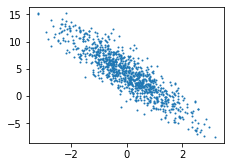

In [32]:
# 设置图的尺寸
def set_figsize(figsize=(3.5, 2.5)):
    plt.rcParams['figure.figsize'] = figsize 
    
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

##### 读取数据
在模型训练的时候，需要遍历数据集并不断读取小批量的数据样本。这里本实验定义一个函数 `𝐝𝐚𝐭𝐚_𝐢𝐭𝐞𝐫()` 它每次返回 𝒃𝒂𝒕𝒄𝒉_𝒔𝒊𝒛𝒆 (批量大小)个随机样本的特征和标签。

In [50]:
num_inputs = 2
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) 
    
    # 样本的读取顺序是随机的 
    random.shuffle(indices) 
    
    # 最后一次可能不足一个batch
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        
        # 按行选取
        yield features.index_select(dim=0, index=j), labels.index_select(0, j)

##### 构建模型
在构建模型之前，需要将权重和偏置初始化。本实验将权重初始化成均值为0、标准差为 0.01的正态随机数，偏置初始化为0。

In [52]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32) 
b = torch.zeros(1, dtype=torch.float32)
w, b

(tensor([[-0.0003],
         [ 0.0123]]),
 tensor([0.]))

在后面的模型训练中，需要对这些参数求梯度来迭代参数的值，因此要设置requires_grad = True

In [53]:
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

使用 𝐦𝐦() 函数做矩阵乘法，来实现线性回归的模型。

In [54]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

##### 损失函数和优化算法
本实验使用`平方损失`来定义线性回归的损失函数。在实现中，我们需要把真实值 𝑦 变形成预测值 𝑦_h𝑎𝑡 形状。

In [71]:
def squared_loss(y_hat, y):
    return (y_hat.view(y.size()) - y) ** 2 / 2

以下的 sgd 函数实现了小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来提速是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。

In [56]:
def sgd(params, lr, batch_size): 
    for param in params:
        # 注意这里更改param时用的param.data
        param.data -= lr * param.grad / batch_size

##### 模型训练
在训练过程中，模型将会多次迭代更新参数。在每次迭代中，根据当前读取的小批量数据样本(特征 x 和标签 y)，通过调用反向函数backward 计算小批量随机梯度，并调用优化算法 𝐬𝐠𝐝 迭代模型参数 。

In [75]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 32

# 训练模型一共需要num_epochs个迭代周期
for epoch in range(num_epochs): 
    
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次, x和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        
        # 这是一个二维向量
        y_hat = net(X, w, b) 
        
        # l是有关小批量X和y的损失
        l = loss(y_hat, y).sum()  
        
        # 小批量的损失对模型参数求梯度
        l.backward() 
        
        # 使用小批量随机梯度下降迭代模型参数 
        sgd([w, b], lr, batch_size) 
        
        # 梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
        
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.003513
epoch 2, loss 0.000619
epoch 3, loss 0.000144


In [76]:
true_w, w

([2, -3.4],
 tensor([[ 1.9882],
         [-3.3942]], requires_grad=True))

In [77]:
true_b, b

(4.2, tensor([4.1939], requires_grad=True))

#### 利用torch.nn实现线性回归
Torch.nn 模块<br>
+ Pytorch为神经网络设计的模块化接口，该模块定义了大量的神经网络层。<br>
+ 𝐧𝐧 利用 `𝐚𝐮𝐭𝐨𝐠𝐫𝐚𝐝` 来定义模型，其核心数据结构是 `𝐌𝐨𝐝𝐮𝐥𝐞`。<br>

下表给出了部分 𝐧𝐧 中所包含模块(其它模块可查阅官方API):

|模块|作用|
|:---:|:----:|
|torch.nn.Module()|Module是所有神经网络模块的基类|
|torch.nn.Linear()|Linear用于对输入数据进行线性变换|
|torch.nn.Sequential()|Sequential是一个顺序容器, 其中模块的添加顺序与在构造函数中传递模块时的顺序相同|
|torch.nn.MSELoss|MSELoss用于衡量输入 x 和目标 y 中每个元素之间的均方误差的标准。|

##### 读取数据
PyTorch提供了 𝐝𝐚𝐭𝐚 库来读取数据。由于data常用作变量名，这里将导入的 𝐝𝐚𝐭𝐚 模块用 𝐃𝐚𝐭𝐚 代替。 对前面的读取数据部分可以使用 𝐝𝐚𝐭𝐚 库来处理。在每一次迭代中，使用 𝐃𝐚𝐭𝐚 随机读取包含10个数据 样本的小批量。

In [84]:
lr = 0.03
batch_size = 10

# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)

# 把 dataset 放入 DataLoader
data_iter = Data.DataLoader(
    dataset=dataset,         # torch TensorDataset format
    batch_size=batch_size,   # mini batch size
    shuffle=True,            # 是否打乱数据 (训练集一般需要进行打乱) 
    num_workers=2,           # 多线程来读数据，注意在Windows下需要设置为0
)

##### 构建模型
构建模型的过程中，最常见的方法就是继承 𝐧𝐧. 𝐌𝐨𝐝𝐮𝐥𝐞, 然后构建自己的网络。<br>
一个 𝐧𝐧.𝐌𝐨𝐝𝐮𝐥𝐞 实例需要包含一些层以及返回输出的前向传播方法。

In [91]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__() 
        self.linear = nn.Linear(n_feature, 1)
        
    # forward 定义前向传播
    def forward(self, x): 
        y = self.linear(x) 
        return y
    
net = LinearNet(num_inputs)
net

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

除了继承 𝐧𝐧.𝐌𝐨𝐮𝐝𝐥𝐞 来构建线性回归模型，还可以利用 𝐧𝐧.𝐒𝐞𝐪𝐮𝐞𝐧𝐭𝐢𝐚𝐥 结合 𝐧𝐧.𝐋𝐢𝐧𝐞𝐚𝐫 来搭建模型

In [89]:
#写法一
net = nn.Sequential( 
    nn.Linear(num_inputs, 1) # 此处可以添加其它层
)

# 写法二
# net = nn.Sequential()
# net.add_module('linear', nn.Linear(num_inputs, 1)) 
# net.add_module.........

# 写法三
# from collections import OrderedDict
# net = nn.Sequential(OrderedDict([
# ('linear', nn.Linear(num_inputs, 1)) 
# ......]))

##### 模型参数初始化
在使用定义的模型 net 之前，需要对模型中的一些参数进行初始化。PyTorch 在 init 模块 中提供了许多初始化参数的方法。我们可以调用𝐢𝐧𝐢𝐭.𝐧𝐨𝐫𝐦𝐚𝐥模块通过正态分布对线性回归中的权重和偏差进行初始化

In [90]:
nn.init.normal_(net[0].weight, mean=0, std=0.01)

# 也可以直接修改bias的data:net[0].bias.data.fill_(0)
nn.init.constant_(net[0].bias, val=0) 

Parameter containing:
tensor([0.], requires_grad=True)

##### 损失函数和优化
Pytorch 在 𝑡𝑜𝑟𝑐h.𝑛𝑛 中提供了各种损失函数，这些损失函数实现为 𝐧𝐧.𝐌𝐨𝐝𝐮𝐥𝐞 的子类，可以将这些损失函数作为一种特殊的层。

In [93]:
loss = nn.MSELoss()
loss

MSELoss()

Pytorch在 𝐭𝐨𝐫𝐜𝐡.𝐨𝐩𝐭𝐢𝐦 模块中提供了诸如 𝑺𝑮𝑫、𝑨𝒅𝒂𝒎 和 𝑹𝑴𝑺𝑷𝒓𝒐𝒐𝒑 等优化算法。

In [97]:
# 梯度下降的学习率指定为0.03
optimizer = optim.SGD(net.parameters(), lr=0.03)

# 可以为不同的子网络设置不同学习率
# optimizer =optim.SGD([
#     # 如果不指定学习率，则用默认的最外层学习率 
#     {'params': net.subnet1.parameters()}，
#     {'params': net.subnet2.parameters(), 'lr': 0.01}
# ], lr=0.03)

##### 模型训练
训练模型时，可以调用 𝐨𝐩𝐭𝐢𝐦 中的 𝐬𝐭𝐞𝐩() 函数来迭代模型参数。<br>
按照小批量随机梯度下降的定义，在 𝐬𝐭𝐞𝐩() 函数中指定批量大小，从而对批量中的样本梯度求平均。

In [99]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter: 
        output = net(X)
        l = loss(output, y.view(-1, 1))

        # 梯度清零，等价于net.zero_grad() 
        optimizer.zero_grad() 

        l.backward()

        optimizer.step()

    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000073
epoch 2, loss: 0.000065
epoch 3, loss: 0.000157


##### 模型预测及评价
对于分类问题，给定任一样本特征，模型可以预测每个输出类别的概率。通常，我们把预测概率最 大的类别作为输出类别。如果它与真实类别(标签)一致，说明这次预测是正确的。我们使用准确 率(accuracy)来评价模型的表现。它等于正确预测数量与总预测数量之比。